##### sigmoid function -> it gives a value in the range of 0 - 1 , very usefull
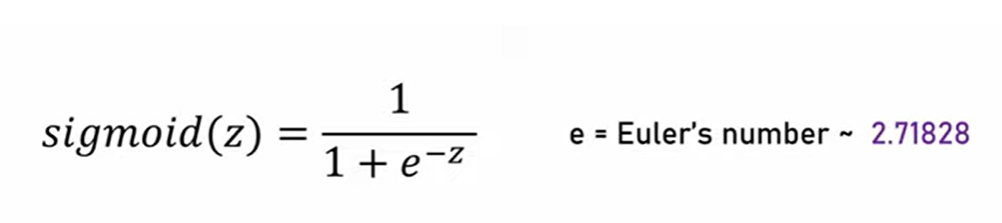

##### logit and sigmoid function are inverse of each other , i.e sigmoid function converts any value in range of 0 and 1 whereas logit function converts any value between 0 and 1 to real numbers between -inf to +inf

##### sigmoid function also has problem of vanishing gradient problem

#### sigmoid function act as activation function in neuron

##### NEURON: a neuron consit of linear equation of a function and then whatever is output it tries to convert it in some range (eg. 0 to 1 , -1 to 1 ). such function are called activation function

#### neuron visualization in matematical terms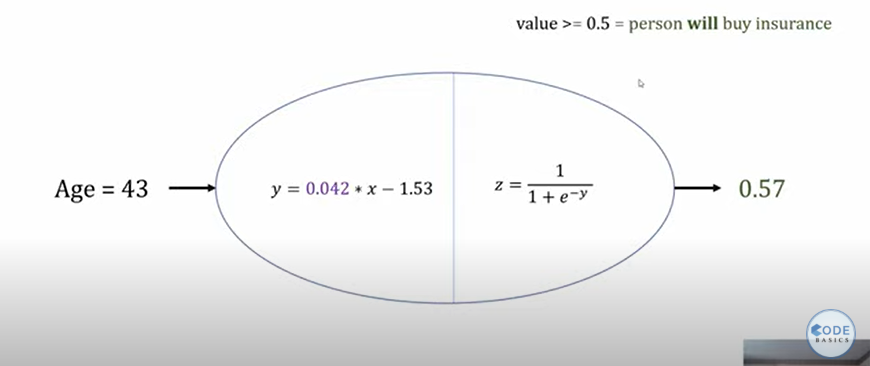

##### in above figure the circle represent a neuron , where y = mx + b is a linear function, in real neuron it can be any other function as well but it is always a mathematical function, second part is activation function which converts the output of the first function which is y in a range of 0 to 1.

##### 
      age -> a feature(in term of ml) , in above figure
      0.041 is weight   y = wx + b
      b -> bias

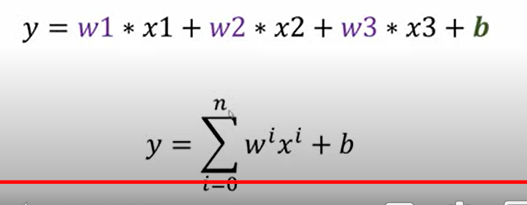

##### hidden layers: in these layers feature detection takes place i.e the main work of neural network

### training a small neural network for detecting handwritten numbers

In [52]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
len(X_train)

60000

In [55]:
len(X_test)

10000

In [56]:
X_train[0].shape

(28, 28)

In [57]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

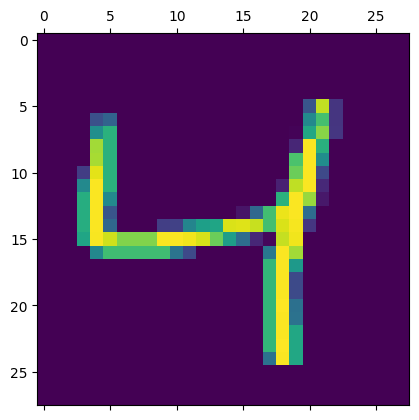

In [58]:
plt.matshow(X_train[2])

In [59]:
y_train[2]

4

##### we have to flatten this 28*28 neural network since the neuron will handle in that way only

In [60]:
len(X_train)

60000

In [61]:
X_train.shape   #it is saying there are 60k images with each iamge of size 28*28 pixels

(60000, 28, 28)

In [62]:
#reducing the value between 0 and 1 for each pixels for easy calculation , this is not required but suggested for efficient calculation
X_train = X_train/255.0
X_test = X_test/255.0

In [63]:
X_train_flattened = X_train.reshape(len(X_train),28*28)  #we are flattening the input data from 2d image to 1d flattened pixels
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [64]:
X_train_flattened.shape

(60000, 784)

In [65]:
X_test_flattend.shape

(10000, 784)

##### creating neural network

In [66]:
model = keras.Sequential([
    #we are saying input shape is 784 and output are 10 neurons
    keras.layers.Dense(10,input_shape= (784,),activation = 'sigmoid')
])
model.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 779us/step - loss: 0.4640 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.3035 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.2829 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2727 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2668 - accuracy: 0.9254


In [67]:
X_test_flattend[0].shape

(784,)

In [68]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 0s 654us/step - loss: 0.2710 - accuracy: 0.9241


[0.2710331678390503, 0.9240999817848206]

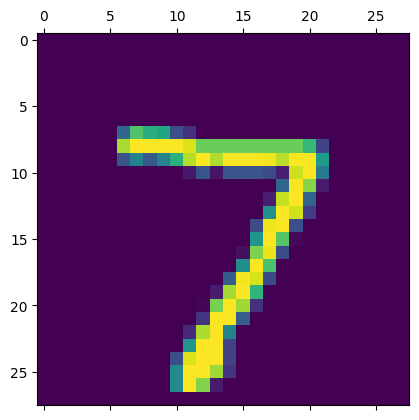

In [72]:
plt.matshow(X_test[0])

In [73]:
Y_predicted = model.predict(X_test_flattend)

313/313 [==============================] - 0s 528us/step


In [74]:
np.argmax(Y_predicted[0])

7

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_1_input')>

(1, 784)
1/1 [==============================] - 0s 17ms/step
0
0


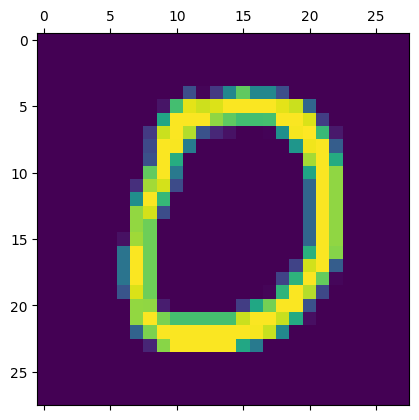

In [84]:
#predicting a single image ouptut using tensorflow expand_dims function to increase number of images dimension
batch_input = tensorflow.expand_dims(X_test_flattend[10], axis=0)
print(batch_input.shape)

#prediction
single_image_prediction = model.predict(batch_input)
exact_predicted_value  = np.argmax(single_image_prediction)

#original value
print(y_test[10])
#predicted value
print(exact_predicted_value)
plt.matshow(X_test[10])

In [90]:
#drawing confusion matrix
#in the below we are getting final single output out of the probablility of all the numbers
y_predicted_final = [np.argmax(i) for i in Y_predicted]
y_predicted_final[:10]

cn = tensorflow.math.confusion_matrix(labels=y_test, predictions = y_predicted_final)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    3,    5,    1,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    9,  921,   17,    5,    2,   14,    8,   41,    5],
       [   4,    0,   19,  925,    0,   21,    3,    9,   20,    9],
       [   2,    1,    5,    2,  894,    0,   15,    4,   10,   49],
       [  11,    2,    3,   36,    7,  770,   22,    4,   30,    7],
       [  14,    3,    6,    1,    7,    7,  917,    2,    1,    0],
       [   3,    5,   24,    9,    6,    1,    0,  934,    3,   43],
       [   9,    6,    7,   24,    8,   26,   12,    7,  864,   11],
       [  12,    6,    1,   11,   18,    6,    0,   10,    5,  940]])>

Text(95.72222222222221, 0.5, 'Prediction')

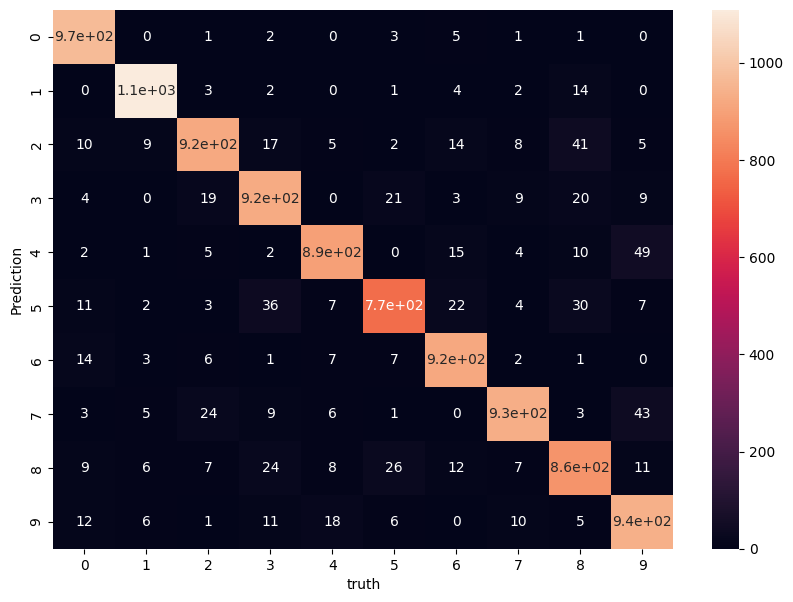

In [93]:
import seaborn as sn

plt.figure(figsize =(10,7))
sn.heatmap(cn,annot=True)
plt.xlabel('truth')
plt.ylabel('Prediction')

##### writing flatten function inside the model itself

In [96]:
flattend_layer_embedded_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10,activation = 'sigmoid')
])
flattend_layer_embedded_model.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

flattend_layer_embedded_model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.4735 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.2726 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2669 - accuracy: 0.9256


In [101]:
#creating a batch
  = tensorflow.expand_dims(X_test[0], axis=0)
image_input.shape

#calling prediction this way 
print(np.argmax(flattend_layer_embedded_model(image_input)))

#or the normal way
np.argmax(flattend_layer_embedded_model.predict(image_input))

7
1/1 [==============================] - 0s 28ms/step


7